In [1]:
import pandas as pd
file=pd.read_csv('mnist_train.csv')
print(file.shape)
print(file)
mnist=dict()
print(file.columns)
mnist['data']=file
mnist['target']=file['label']
del mnist['data']['label']
mnist['data']=mnist['data'].values
mnist['target']=mnist['target'].values
X,y=mnist['data'],mnist['target']
X_train,y_train,X_test,y_test=X[:50000],y[:50000],X[50000:],y[50000:]
import numpy as np
shuffle_index=np.random.permutation(50000)
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

(60000, 785)
       label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...    28x19  \
0          5    0    0    0    0    0    0    0    0    0  ...        0   
1          0    0    0    0    0    0    0    0    0    0  ...        0   
2          4    0    0    0    0    0    0    0    0    0  ...        0   
3          1    0    0    0    0    0    0    0    0    0  ...        0   
4          9    0    0    0    0    0    0    0    0    0  ...        0   
5          2    0    0    0    0    0    0    0    0    0  ...        0   
6          1    0    0    0    0    0    0    0    0    0  ...        0   
7          3    0    0    0    0    0    0    0    0    0  ...        0   
8          1    0    0    0    0    0    0    0    0    0  ...        0   
9          4    0    0    0    0    0    0    0    0    0  ...        0   
10         3    0    0    0    0    0    0    0    0    0  ...        0   
11         5    0    0    0    0    0    0    0    0    0  ...        0   
12         3

In [2]:
from sklearn.neighbors import KNeighborsClassifier as kn

knn_clf=kn()
X_train=X_train[:500]
y_train=y_train[:500]
X_train.shape

(500, 784)

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
def move_right(imgx):
    right=imgx.reshape(28,28)[:,0:-1]
    left=np.zeros(28)
    con=np.c_[left,right]
    return con.flatten()
def move_left(imgx):
    right=imgx.reshape(28,28)[:,1:]
    left=np.zeros(28)
    con=np.c_[right,left]
    return con.flatten()
def move_up(imgx):
    right=imgx.reshape(28,28)[1:,:]
    left=np.zeros(28)
    left=left.reshape(1,28)
    con=np.r_[right,left]
    return con.flatten()
def move_down(imgx):
    right=imgx.reshape(28,28)[:-1,:]
    left=np.zeros(28)
    left=left.reshape(1,28)
    con=np.r_[left,right]
    return con.flatten()
right_X_train=np.apply_along_axis(move_right,axis=1,arr=X_train)
print(X_train.shape,right_X_train.shape)
left_X_train=np.apply_along_axis(move_left,axis=1,arr=X_train)
up_X_train=np.apply_along_axis(move_up,axis=1,arr=X_train)
down_X_train=np.apply_along_axis(move_down,axis=1,arr=X_train)
X_train=np.r_[X_train,left_X_train,right_X_train,up_X_train,down_X_train]
y_train=np.r_[y_train,y_train,y_train,y_train,y_train]
X_train.shape,y_train.shape

(500, 784) (500, 784)


((2500, 784), (2500,))

In [5]:
kn_clf=kn(weights='distance',n_neighbors=6,p=4)
grid_clf=kn_clf
print('start!')
import time
t1=time.time()
grid_clf.fit(X_train,y_train)
t2=time.time()
print(t2-t1,'seconds')

start!
0.06273317337036133 seconds


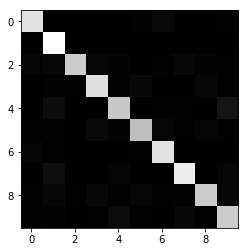

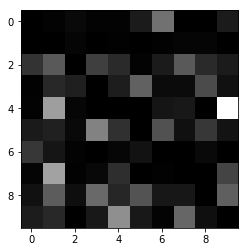

0.29198384284973145 s


array([[ 929,    1,    3,    1,    1,    9,   38,    0,    0,    9],
       [   0, 1056,    2,    0,    1,    0,    1,    2,    2,    0],
       [  17,   30,  845,   21,   14,    1,    9,   30,   14,    9],
       [   1,   14,   11,  920,   10,   34,    4,    4,   26,    6],
       [   1,   52,    2,    0,  829,    0,    7,    8,    0,   84],
       [   8,   10,    3,   40,   15,  786,   25,    5,   17,    6],
       [  18,    7,    1,    0,    2,    6,  930,    0,    3,    0],
       [   2,   59,    1,    3,   17,    0,    1,  982,    0,   25],
       [   6,   31,    5,   36,   13,   28,    8,    8,  842,   32],
       [   9,   13,    0,    8,   46,    8,    1,   33,    5,  838]])

In [6]:
y_test_pred=grid_clf.predict(X_test)
t3=time.time()
from sklearn.metrics import confusion_matrix
cm_test=confusion_matrix(y_test,y_test_pred)
new_cm=(cm_test/cm_test.sum(axis=1,keepdims=True))
np.fill_diagonal(new_cm,0)
plt.imshow(cm_test,cmap=plt.cm.gray)
plt.show()
plt.imshow(new_cm,cmap=plt.cm.gray)
plt.show()
print(time.time()-t3,'s')
cm_test

In [7]:
sum(y_test_pred==y_test)/len(y_test)

0.8957